#### 다중분류를 위한 OvR(OvA)
- 분류 클래스 수 만큼 2진 분류기를 생성하여 다중 분류를 진행

In [13]:
## 모듈 로딩
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

- 데이터셋 load_digits
    * 내장 데이터셋
    * 이미지 데이터셋 => 8 * 8 크기 이미지 => 1D으로 64개 (8*8) 피쳐
    * 이미지 라벨/타겟 => 숫자 0~9까지 즉, 총 10개 클래스
    * 흑백 이미지

In [14]:
# 데이터 로딩
featureDF, targetSR = load_digits(as_frame=True, return_X_y=True)

# 이미지 픽셀 : 0 ~ 255 범위
featureDF = featureDF/255

print(featureDF.shape, featureDF.ndim, targetSR.shape, targetSR.ndim)

(1797, 64) 2 (1797,) 1


In [15]:
featureDF.head(2), targetSR.head(2)

(   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0    0.00000    0.00000    0.01961    0.05098    0.03529    0.00392   
 1    0.00000    0.00000    0.00000    0.04706    0.05098    0.01961   
 
    pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0    0.00000    0.00000    0.00000    0.00000  ...    0.00000    0.00000   
 1    0.00000    0.00000    0.00000    0.00000  ...    0.00000    0.00000   
 
    pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
 0    0.00000    0.00000    0.02353    0.05098    0.03922    0.00000   
 1    0.00000    0.00000    0.00000    0.04314    0.06275    0.03922   
 
    pixel_7_6  pixel_7_7  
 0    0.00000    0.00000  
 1    0.00000    0.00000  
 
 [2 rows x 64 columns],
 0    0
 1    1
 Name: target, dtype: int32)

In [16]:
## 이미지 데이터 시각화
import matplotlib.pyplot as plt

imgdata =featureDF.iloc[0].to_numpy().reshape(-1, 8)
imgdata.shape

(8, 8)

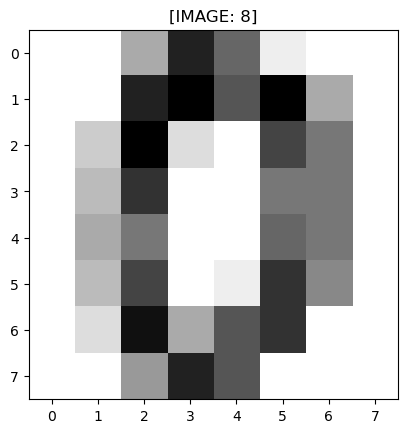

In [17]:
# 시각화
plt.imshow(imgdata, cmap='binary')
plt.title(f'[IMAGE: {targetSR[1796]}]')
plt.show()

- 학습용 데이터셋 준비 : trainDS, testDS

In [18]:
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    stratify=targetSR,
                                                    random_state=10)

In [19]:
featureDF.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,...,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000
mean,0.00000,0.00119,0.02041,0.04642,0.04646,0.02267,0.00534,0.00051,0.00002,0.00782,...,0.01461,0.00081,0.00000,0.00110,0.02179,0.04741,0.04631,0.02653,0.00811,0.00143
std,0.00000,0.00356,0.01865,0.01666,0.01681,0.02222,0.01304,0.00407,0.00037,0.01253,...,0.01929,0.00386,0.00009,0.00366,0.02001,0.01716,0.01935,0.02314,0.01604,0.00729
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00392,0.03922,0.03922,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00392,0.04314,0.03922,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.01569,0.05098,0.05098,0.01569,0.00000,0.00000,0.00000,0.00000,...,0.00392,0.00000,0.00000,0.00000,0.01569,0.05098,0.05490,0.02353,0.00000,0.00000
75%,0.00000,0.00000,0.03529,0.05882,0.05882,0.04314,0.00000,0.00000,0.00000,0.01176,...,0.02745,0.00000,0.00000,0.00000,0.03922,0.06275,0.06275,0.04706,0.00784,0.00000
max,0.00000,0.03137,0.06275,0.06275,0.06275,0.06275,0.06275,0.05882,0.00784,0.06275,...,0.06275,0.05098,0.00392,0.03529,0.06275,0.06275,0.06275,0.06275,0.06275,0.06275


- OvR(One vs Rest) 또는 (One vs All)
    - 클래스마다 이진 분류기 만들어서 가장 높은 결정점수 낸 클래스 선택

In [20]:
# 모듈 로딩
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clf.fit(x_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [21]:
# 모델 파라미터
print(f'ovr_clf.estimators_: {len(ovr_clf.estimators_)}개')
print(f'ovr_clf.classes_: {ovr_clf.classes_}')
print(f'ovr_clf.n_classes_: {ovr_clf.n_classes_}')
print(f'ovr_clf.label_binarizer_: {ovr_clf.label_binarizer_}')

ovr_clf.estimators_: 10개
ovr_clf.classes_: [0 1 2 3 4 5 6 7 8 9]
ovr_clf.n_classes_: 10
ovr_clf.label_binarizer_: LabelBinarizer(sparse_output=True)


In [22]:
decision_functions = []
for idx in range(ovr_clf.n_classes_):
    print(f'\n{idx}분류기')
    print(f'[{idx}분류기]', ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_)
    print(ovr_clf.estimators_[idx].decision_function(x_train.iloc[:1]))
    
print(decision_functions)
print()

[0분류기] [[ 0.       -0.117211 -0.361977  0.637993 -0.259516 -1.280042 -0.549555
  -0.051539 -0.002489 -0.450771  0.87553   0.67567   0.761063  1.421815
  -0.372707 -0.047908 -0.000876  0.483967  1.735262 -0.566662 -1.827955
   2.027963  0.680701 -0.023    -0.000234  1.171667  1.431241 -2.773392
  -4.069452  0.621786  1.751173 -0.001039  0.        1.440423  1.660744
  -3.354668 -4.168379 -0.182033  1.700054  0.       -0.006227  0.753401
   2.703978 -2.235013 -2.415652  1.074093  0.919099 -0.012728 -0.001924
   0.023211  2.278424  0.391211  0.569341  1.801441 -0.651051 -0.079346
  -0.000345 -0.112692 -0.545168  0.615148  0.574332 -0.674338 -0.772614
  -0.134407]] [-2.294685]
[1분류기] [[ 0.       -0.143074 -1.132225 -1.180677 -0.866008  0.169236 -0.195313
  -0.061496 -0.003632 -0.881948 -2.792764  0.176256  1.541474  0.322755
  -0.319918 -0.054061 -0.001149 -0.63731  -1.214654  3.468259  3.133466
  -0.135821 -0.452731 -0.026653 -0.000552 -0.068647  0.070149  2.400616
   1.588896 -0.631002 -0

In [23]:
decision_scores = ovr_clf.decision_function(x_test.iloc[:2])
print(decision_scores)

[[-2.460142 -2.472932 -2.016484 -1.436581 -3.020684 -2.128551 -2.402974
  -2.589656 -2.30416  -1.843406]
 [-2.005962 -2.689651 -2.441866 -1.696511 -2.661114 -2.088352 -2.88008
  -2.421032 -2.282877 -1.499372]]


In [24]:
# 예측값 출력
predictions = ovr_clf.predict(x_test.iloc[:2])
print(predictions)

[3 9]


In [25]:
ovr_clf.predict_proba(x_test.iloc[:1])

array([[0.078773, 0.07785 , 0.117592, 0.192254, 0.046543, 0.106452,
        0.083023, 0.069872, 0.090864, 0.136776]])

In [27]:
ovr_clf.predict_proba(x_test.iloc[:1]).argmax(), ovr_clf.predict_proba(x_test.iloc[:1]).max()

(3, 0.19225414581646177)

In [32]:
ovr_clf.predict_proba(x_test.iloc[:1])

array([[0.078773, 0.07785 , 0.117592, 0.192254, 0.046543, 0.106452,
        0.083023, 0.069872, 0.090864, 0.136776]])